In [1]:
import numpy as np
import matplotlib.pyplot as plt

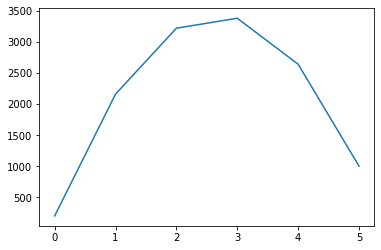

In [2]:
#PARAMETROS FISICOS
L = 5.0
K = 0.02
S = 18
Ta = 200
Tb = 1000

#PARAMETROS NUMERICOS
N=4
h= L/(N+1)

T = np.zeros(N+2)
b = np.zeros(N)
A = np.zeros((N,N))

r = K/h**2
b[:] = S/r
T[0] = Ta
T[-1] = Tb
b[0] += Ta
b[-1] += Tb



A[0,0] = 2
A[0,1] = -1
for i in range(1, N-1):
    A[i,i] = 2
    A[i,i+1] = -1
    A[i,i-1] = -1
A[-1,-2] = -1
A[-1,-1] = 2


T[1:N+1] = np.linalg.solve(A,b)


plt.plot(T)

In [3]:
def conduccion_1d(K ,S ,L ,Ta, Tb, N):
    """ 
  Parameters
  ----------
  L: float
  L es la longitud del dominio.
  
  K: float
  Es la conductividad del material.
  
  S: float
  Es la fuente.
  
  Ta: float
  Es la condición frontera a la izquierda.
  
  Tb: float
  Es la condición frontera de la derecha.
  
  N: int
  Es el número de nodos internos (grados de libertad).
  
  Return
  ------
  Al final esta función dibuja la solución.
    """ 
    h= L/(N+1)

    T = np.zeros(N+2)
    b = np.zeros(N)
    A = np.zeros((N,N))

    r = K/h**2
    b[:] = S/r
    T[0] = Ta
    T[-1] = Tb
    b[0] += Ta
    b[-1] += Tb



    A[0,0] = 2
    A[0,1] = -1
    for i in range(1, N-1):
        A[i,i] = 2
        A[i,i+1] = -1
        A[i,i-1] = -1
    A[-1,-2] = -1
    A[-1,-1] = 2


    T[1:N+1] = np.linalg.solve(A,b)


    plt.plot(T, '-o')
    plt.show

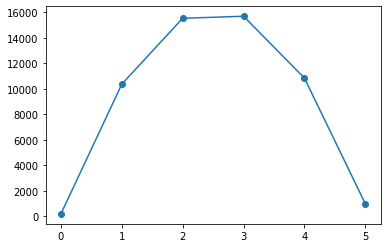

In [4]:
conduccion_1d(0.02, 100, 5.0, 200, 1000, 4)

In [5]:
import ipywidgets as widgets

In [10]:
w = widgets.interactive(conduccion_1d,
                       K = widgets.fixed(0.02),
                       S = widgets.FloatSlider(max=1.6, min=0.0, value=0, step=0.2),
                       L = widgets.fixed(5.0),
                       Ta = widgets.fixed(200),
                       Tb = widgets.fixed(1000),
                       N = widgets.IntSlider(max=25,  min=4, value=10))

#fixed= valor fijo

In [11]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=1.6, step=0.2), IntSlider(value=10, descript…